### Przygotowanie środowiska

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

### Ładowanie danych 

In [2]:
data = pd.read_csv('trj_srt.csv')

In [7]:
data.head()

,ID_DZIECKA,IMIE,PLEC,DATA_URODZENIA,WIEK_MIESIACE,MIEJSCOWOSC,WIELKOSC_KLASA,WOJEWODZTWO,WLACZONE_MOWA,WYKLUCZENIE_POWOD_MOWA,PWZ_WYNIK,PWZ_OK,PWZ_OK_POWOD,PWZ_DATA,PWZ_CZAS,PWZ_01_PKT,PWZ_02_PKT,PWZ_03_PKT,PWZ_04_PKT,PWZ_05_PKT,PWZ_06_PKT,PWZ_07_PKT,PWZ_08_PKT,PWZ_09_PKT,PWZ_10_PKT,PWZ_11_PKT,PWZ_12_PKT,PWZ_13_PKT,PWZ_14_PKT,PWZ_15_PKT,PWZ_16_PKT,PWZ_17_PKT,PWZ_18_PKT,PWZ_19_PKT,PWZ_20_PKT,PWZ_21_PKT,PWZ_22_PKT,PWZ_23_PKT,PWZ_24_PKT,PWZ_25_PKT,PWZ_26_PKT,PWZ_27_PKT,PWZ_28_PKT,PWZ_29_PKT,PWZ_30_PKT,PWZ_31_PKT,PWZ_32_PKT,PWZ_33_PKT,PWZ_34_PKT,PWZ_P1_BODZIEC,PWZ_P1_ODP,PWZ_P2_BODZIEC,PWZ_P2_ODP,PWZ_P3_BODZIEC,PWZ_P3_ODP,PWZ_P4_BODZIEC,PWZ_P4_ODP,PWZ_01_BODZIEC,PWZ_01_ODP,PWZ_02_BODZIEC,PWZ_02_ODP,PWZ_03_BODZIEC,PWZ_03_ODP,PWZ_04_BODZIEC,PWZ_04_ODP,PWZ_05_BODZIEC,PWZ_05_ODP,PWZ_06_BODZIEC,PWZ_06_ODP,PWZ_07_BODZIEC,PWZ_07_ODP,PWZ_08_BODZIEC,PWZ_08_ODP,PWZ_09_BODZIEC,PWZ_09_ODP,PWZ_10_BODZIEC,PWZ_10_ODP,PWZ_11_BODZIEC,PWZ_11_ODP,PWZ_12_BODZIEC,PWZ_12_ODP,PWZ_13_BODZIEC,PWZ_13_ODP,PWZ_14_BODZIEC,PWZ_14_ODP,PWZ_15_BODZIEC,PWZ_15_ODP,PWZ_16_BODZIEC,PWZ_16_ODP,PWZ_17_BODZIEC,PWZ_17_ODP,PWZ_18_BODZIEC,PWZ_18_ODP,PWZ_19_BODZIEC,PWZ_19_ODP,PWZ_20_BODZIEC,PWZ_20_ODP,PWZ_21_BODZIEC,PWZ_21_ODP,PWZ_22_BODZIEC,PWZ_22_ODP,PWZ_23_BODZIEC,PWZ_23_ODP,PWZ_24_BODZIEC,PWZ_24_ODP,PWZ_25_BODZIEC,PWZ_25_ODP,PWZ_26_BODZIEC,PWZ_26_ODP,PWZ_27_BODZIEC,PWZ_27_ODP,PWZ_28_BODZIEC,PWZ_28_ODP,PWZ_29_BODZIEC,PWZ_29_ODP,PWZ_30_BODZIEC,PWZ_30_ODP,PWZ_31_BODZIEC,PWZ_31_ODP,PWZ_32_BODZIEC,PWZ_32_ODP,PWZ_33_BODZIEC,PWZ_33_ODP,PWZ_34_BODZIEC,PWZ_34_ODP
0,K.41-01.GPRZ01.A12.WW.MA,Magdalena,1,27/03/2010 00:00,50,JELEŚNIA,1,12,1,NIE DOTYCZY,13,1,ZZZ,04/06/2014 00:00,8,1,1,1,0,0,1,1,1,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,ZZZ,Julka ma kolorowy parasol,ZZZ,Pingwiny są dobre pływakami,ZZZ,Helenka nie lubi chodzić w kaloszach,ZZZ,Ksyś musi odebrać Ksysia z przedszkola,ZZZ,Mama robi pierogi z jagodami,ZZZ,Ściany są pomalowane na żółto,ZZZ,Dzieci pojadą na wycieczkę do lasu,ZZZ,BRAK,ZZZ,Ania poszła zbierać do lasu kasztany,ZZZ,"Marek miał cukierka, ale go nie zjadł",ZZZ,Oni mogą jeść lody z owocami,ZZZ,Babcia musiała pojechać do sklepu,ZZZ,Sandały są schowane pod łóżkiem,ZZZ,Ona nie mogła jeździć na rowerze,ZZZ,Wojtek nie chce pisać do kolegi listu,ZZZ,Auto przez wujka było umyte,ZZZ,Kasia nie będzie śpiewać piosenki,ZZZ,On nie będzie szukał w szafie skarpetek,ZZZ,"Michał patrzy, jak pan maluje podłogę",ZZZ,Kanapa była niscona od psa,ZZZ,Radek nie będzie grał na komputerze,ZZZ,"Zosia myśli, że w rzece jest zimna woda",ZZZ,"To jest ten obraz, który namalowała ...",ZZZ,Którym na dziadek siedzi krześle to jest zepsute,ZZZ,"Ciocia wymyśliła pomysł, że się bawi w bal",ZZZ,Które wybrała buty to są za małe,ZZZ,"Kuba znalazł capkę, która zgubiła babcia",ZZZ,"Tata kupi, kupić komputer",ZZZ,"Idziemy do piekarni, w której jest dobry...",ZZZ,"Zuzia karmi psa, którego dostał Mateusz",ZZZ,"Marcin był zły na ..., bo mu złamała kredkę",ZZZ,Którą ugotował tata zupę jest pyszna,ZZZ,"To jest ten pan, którego zaprosili rodzice",ZZZ,Rodzina zachęca nas do pracy,ZZZ,"Mama mieszka w bloku, w którym jest plac zabaw",ZZZ,On...,ZZZ,"To ten, który robił...",ZZZ,Magda...
1,K.41-01.GPRZ01.N07.WW.KL,Klaudia,1,10/09/2010 00:00,49,JELEŚNIA,1,12,1,NIE DOTYCZY,1,1,ZZZ,06/11/2014 00:00,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ZZZ,Julka ma kolorowy parasol,ZZZ,Pingwiny są świetnymi pływakami,ZZZ,Helenka nie lubi chodzić w kaloszach,ZZZ,Krzyś musi odebrać brata z przedszkola,ZZZ,z toładami,ZZZ,na żółto,ZZZ,Tak kiedyś mnie tata wziął,ZZZ,tak,ZZZ,Kasztany poszła Ania....,ZZZ,nie zjadł,ZZZ,z owocami,ZZZ,BRAK,ZZZ,Sandały są pod łóżkiem,ZZZ,Ona nie mogła jeździć na rowerze ona,ZZZ,do kolegi,ZZZ,wujka,ZZZ,piosenki,ZZZ,szafie,ZZZ,"Michał patrzy, jak maluje podłogę",ZZZ,psa,ZZZ,Radek będzie mógł na komputerze,ZZZ,BRAK,ZZZ,namalowała ewa,ZZZ,dziadek,ZZZ,bal,ZZZ,za małe,ZZZ,babcia,ZZZ,komputer,ZZZ,chleb,ZZZ,Mateusz,ZZZ,kredkę,ZZZ,pyszna,ZZZ,BRAK,ZZZ,BRAK,ZZZ,af,ZZZ,on potrzebuje,Z

## 1. Błędy/wątpliwości
#### a) niespójna punktacja !fałyszywy alarm
01 - to pytanie pierwsze testowe, P1 to pytanie próbne

In [9]:
data[["PWZ_01_PKT", "PWZ_P1_BODZIEC", "PWZ_P1_ODP"]].head().reset_index(drop=True)

,PWZ_01_PKT,PWZ_P1_BODZIEC,PWZ_P1_ODP
0,1,ZZZ,Julka ma kolorowy parasol
1,0,ZZZ,Julka ma kolorowy parasol
2,0,ZZZ,Julka ma parasol
3,1,ZZZ,Julka ma kolorowy parasol
4,1,ZZZ,Julka ma kolorowy parasol


### sprawdzenie, czy wszystkie odpowiedzi są ocenione poprawnie.
Jako wyznacznik poprawności wzięto zdania powtórzone przez osobę z maksymalną liczbą punktów

In [181]:
odp_cols = [i for i in data.columns.values  if (i[-3:] == 'ODP')]

In [191]:
odp = data.loc[data.PWZ_WYNIK==34, odp_cols].iloc[[0], :]
odp

,PWZ_P1_ODP,PWZ_P2_ODP,PWZ_P3_ODP,PWZ_P4_ODP,PWZ_01_ODP,PWZ_02_ODP,PWZ_03_ODP,PWZ_04_ODP,PWZ_05_ODP,PWZ_06_ODP,PWZ_07_ODP,PWZ_08_ODP,PWZ_09_ODP,PWZ_10_ODP,PWZ_11_ODP,PWZ_12_ODP,PWZ_13_ODP,PWZ_14_ODP,PWZ_15_ODP,PWZ_16_ODP,PWZ_17_ODP,PWZ_18_ODP,PWZ_19_ODP,PWZ_20_ODP,PWZ_21_ODP,PWZ_22_ODP,PWZ_23_ODP,PWZ_24_ODP,PWZ_25_ODP,PWZ_26_ODP,PWZ_27_ODP,PWZ_28_ODP,PWZ_29_ODP,PWZ_30_ODP,PWZ_31_ODP,PWZ_32_ODP,PWZ_33_ODP,PWZ_34_ODP
392,Julka ma kolorowy parasol,Pingwiny są świetnymi pływakami,Helenka nie lubi chodzić w kaloszach,Krzyś musi odebrać brata z przedszkola,Mama robi pierogi z jagodami,Ściany są pomalowane na żółto,Dzieci pojadą na wycieczkę do lasu,Antek będzie pił gorące kakao,Ania poszła do parku zbierać kasztany,"Marek miał cukierka, ale go nie zjadł",Oni mogą jeść lody z owocami,Babcia musiała pojechać do sklepu,Sandały są schowane pod łóżkiem,Ona nie mogła jeździć na rowerze,Wojtek nie chce pisać listu do kolegi,Auto zostało umyte przez wujka,Kasia nie będzie śpiewać piosenki,On nie będzie szukał skarpetek w szafie,"Michał patrzy, jak pan maluje podłogę",Kanapa została zniszczona przez psa,Radek będzie mógł grać na komputerze,"Zosia myśli, że w rzece jest zimna woda","To jest ten obraz, który namalowała Ewa","Krzesło, na którym siedzi dziadek, jest zepsute","Ciocia wpadła na pomysł, żeby urządzić bal","Buty, które wybrała Klaudia, są za małe","Kuba znalazł czapkę, którą zgubiła babcia","Sonia prosi tatę, żeby jej kupił komputer","Idziemy do piekarni, w której jest świeży chleb","Zuzia karmi psa, którego dostał Mateusz","Marcin był zły na siostrę, bo mu złamała kredkę","Zupa, którą ugotował tata, jest pyszna","To jest ten pan, którego zaprosili rodzice",Obietnica nagrody zachęca nas do pracy,"Natalia mieszka w bloku, przy którym jest plac...","Piotr pożycza bratu plecak, kiedy on go potrze...","Pan, do którego dzwonił tata, bardzo nam pomógł","Mama nie zagra z Magdą, dopóki ona jej nie prz..."


In [192]:
odp.replace('[^a-zA-Z żźćńśąęłó]', '', regex=True, inplace=True)
odp

,PWZ_P1_ODP,PWZ_P2_ODP,PWZ_P3_ODP,PWZ_P4_ODP,PWZ_01_ODP,PWZ_02_ODP,PWZ_03_ODP,PWZ_04_ODP,PWZ_05_ODP,PWZ_06_ODP,PWZ_07_ODP,PWZ_08_ODP,PWZ_09_ODP,PWZ_10_ODP,PWZ_11_ODP,PWZ_12_ODP,PWZ_13_ODP,PWZ_14_ODP,PWZ_15_ODP,PWZ_16_ODP,PWZ_17_ODP,PWZ_18_ODP,PWZ_19_ODP,PWZ_20_ODP,PWZ_21_ODP,PWZ_22_ODP,PWZ_23_ODP,PWZ_24_ODP,PWZ_25_ODP,PWZ_26_ODP,PWZ_27_ODP,PWZ_28_ODP,PWZ_29_ODP,PWZ_30_ODP,PWZ_31_ODP,PWZ_32_ODP,PWZ_33_ODP,PWZ_34_ODP
392,Julka ma kolorowy parasol,Pingwiny są świetnymi pływakami,Helenka nie lubi chodzić w kaloszach,Krzyś musi odebrać brata z przedszkola,Mama robi pierogi z jagodami,ciany są pomalowane na żółto,Dzieci pojadą na wycieczkę do lasu,Antek będzie pił gorące kakao,Ania poszła do parku zbierać kasztany,Marek miał cukierka ale go nie zjadł,Oni mogą jeść lody z owocami,Babcia musiała pojechać do sklepu,Sandały są schowane pod łóżkiem,Ona nie mogła jeździć na rowerze,Wojtek nie chce pisać listu do kolegi,Auto zostało umyte przez wujka,Kasia nie będzie śpiewać piosenki,On nie będzie szukał skarpetek w szafie,Michał patrzy jak pan maluje podłogę,Kanapa została zniszczona przez psa,Radek będzie mógł grać na komputerze,Zosia myśli że w rzece jest zimna woda,To jest ten obraz który namalowała Ewa,Krzesło na którym siedzi dziadek jest zepsute,Ciocia wpadła na pomysł żeby urządzić bal,Buty które wybrała Klaudia są za małe,Kuba znalazł czapkę którą zgubiła babcia,Sonia prosi tatę żeby jej kupił komputer,Idziemy do piekarni w której jest świeży chleb,Zuzia karmi psa którego dostał Mateusz,Marcin był zły na siostrę bo mu złamała kredkę,Zupa którą ugotował tata jest pyszna,To jest ten pan którego zaprosili rodzice,Obietnica nagrody zachęca nas do pracy,Natalia mieszka w bloku przy którym jest plac ...,Piotr pożycza bratu plecakkiedy on go potrzebuje,Pan do którego dzwonił tata bardzo nam pomógł,Mama nie zagra z Magdą dopóki ona jej nie prze...


In [196]:
odp.apply(lambda x: x.astype(str).str.lower())

,PWZ_P1_ODP,PWZ_P2_ODP,PWZ_P3_ODP,PWZ_P4_ODP,PWZ_01_ODP,PWZ_02_ODP,PWZ_03_ODP,PWZ_04_ODP,PWZ_05_ODP,PWZ_06_ODP,PWZ_07_ODP,PWZ_08_ODP,PWZ_09_ODP,PWZ_10_ODP,PWZ_11_ODP,PWZ_12_ODP,PWZ_13_ODP,PWZ_14_ODP,PWZ_15_ODP,PWZ_16_ODP,PWZ_17_ODP,PWZ_18_ODP,PWZ_19_ODP,PWZ_20_ODP,PWZ_21_ODP,PWZ_22_ODP,PWZ_23_ODP,PWZ_24_ODP,PWZ_25_ODP,PWZ_26_ODP,PWZ_27_ODP,PWZ_28_ODP,PWZ_29_ODP,PWZ_30_ODP,PWZ_31_ODP,PWZ_32_ODP,PWZ_33_ODP,PWZ_34_ODP
392,julka ma kolorowy parasol,pingwiny są świetnymi pływakami,helenka nie lubi chodzić w kaloszach,krzyś musi odebrać brata z przedszkola,mama robi pierogi z jagodami,ciany są pomalowane na żółto,dzieci pojadą na wycieczkę do lasu,antek będzie pił gorące kakao,ania poszła do parku zbierać kasztany,marek miał cukierka ale go nie zjadł,oni mogą jeść lody z owocami,babcia musiała pojechać do sklepu,sandały są schowane pod łóżkiem,ona nie mogła jeździć na rowerze,wojtek nie chce pisać listu do kolegi,auto zostało umyte przez wujka,kasia nie będzie śpiewać piosenki,on nie będzie szukał skarpetek w szafie,michał patrzy jak pan maluje podłogę,kanapa została zniszczona przez psa,radek będzie mógł grać na komputerze,zosia myśli że w rzece jest zimna woda,to jest ten obraz który namalowała ewa,krzesło na którym siedzi dziadek jest zepsute,ciocia wpadła na pomysł żeby urządzić bal,buty które wybrała klaudia są za małe,kuba znalazł czapkę którą zgubiła babcia,sonia prosi tatę żeby jej kupił komputer,idziemy do piekarni w której jest świeży chleb,zuzia karmi psa którego dostał mateusz,marcin był zły na siostrę bo mu złamała kredkę,zupa którą ugotował tata jest pyszna,to jest ten pan którego zaprosili rodzice,obietnica nagrody zachęca nas do pracy,natalia mieszka w bloku przy którym jest plac ...,piotr pożycza bratu plecakkiedy on go potrzebuje,pan do którego dzwonił tata bardzo nam pomógł,mama nie zagra z magdą dopóki ona jej nie prze...


In [213]:
data_melted = data.melt(id_vars = ['ID_DZIECKA'], value_vars= odp_cols, value_name = "odp", var_name = "zdanie")
data_melted2 = data.melt(id_vars = ['ID_DZIECKA'], value_vars= item_cols, value_name = "wynik", var_name = "zdanie")
data_melted.zdanie = data_melted.zdanie.str[0:-4]
data_melted2.zdanie = data_melted2.zdanie.str[0:-4].

In [222]:
data_merged = pd.merge(data_melted2, data_melted, how="left", on=["ID_DZIECKA", "zdanie"])

In [225]:
odp_melted = odp.melt(value_vars= odp_cols, value_name = "odp", var_name = "zdanie")
odp_melted.zdanie = odp_melted.zdanie.str[0:-4]

In [223]:
data_merged.odp = data_merged.odp.str.lower().replace('[^a-zA-Z żźćńśąęłó]', '', regex=True)

In [227]:
data_merged = pd.merge(data_merged, odp_melted, how="left", on=["zdanie"])

In [228]:
data_merged.head()

,ID_DZIECKA,zdanie,wynik,odp_x,odp_y
0,K.41-01.GPRZ01.A12.WW.MA,PWZ_01,1,mama robi pierogi z jagodami,Mama robi pierogi z jagodami
1,K.41-01.GPRZ01.N07.WW.KL,PWZ_01,0,z toładami,Mama robi pierogi z jagodami
2,K.41-01.GPRZ02.A05.WW.MA,PWZ_01,0,mama robi z jagodami pierogi,Mama robi pierogi z jagodami
3,K.41-01.GPRZ02.A08.WW.MA,PWZ_01,1,mama robi pierogi z jagodami,Mama robi pierogi z jagodami
4,K.41-01.GPRZ02.A12.WW.OL,PWZ_01,1,mama robi pierogi z jagodami,Mama robi pierogi z jagodami


### nie ma zdań ze złą punktacją

In [230]:
data_merged.loc[(data_merged.odp_x==data_merged.odp_y) & (data_merged.wynik==0), :]

,ID_DZIECKA,zdanie,wynik,odp_x,odp_y


#### b) wynik niezgodny z sumą poszczególnych punktów

In [20]:
data.columns.values

array(['ID_DZIECKA', 'IMIE', 'PLEC', 'DATA_URODZENIA', 'WIEK_MIESIACE',
       'MIEJSCOWOSC', 'WIELKOSC_KLASA', 'WOJEWODZTWO', 'WLACZONE_MOWA',
       'WYKLUCZENIE_POWOD_MOWA', 'PWZ_WYNIK', 'PWZ_OK', 'PWZ_OK_POWOD',
       'PWZ_DATA', 'PWZ_CZAS', 'PWZ_01_PKT', 'PWZ_02_PKT', 'PWZ_03_PKT',
       'PWZ_04_PKT', 'PWZ_05_PKT', 'PWZ_06_PKT', 'PWZ_07_PKT',
       'PWZ_08_PKT', 'PWZ_09_PKT', 'PWZ_10_PKT', 'PWZ_11_PKT',
       'PWZ_12_PKT', 'PWZ_13_PKT', 'PWZ_14_PKT', 'PWZ_15_PKT',
       'PWZ_16_PKT', 'PWZ_17_PKT', 'PWZ_18_PKT', 'PWZ_19_PKT',
       'PWZ_20_PKT', 'PWZ_21_PKT', 'PWZ_22_PKT', 'PWZ_23_PKT',
       'PWZ_24_PKT', 'PWZ_25_PKT', 'PWZ_26_PKT', 'PWZ_27_PKT',
       'PWZ_28_PKT', 'PWZ_29_PKT', 'PWZ_30_PKT', 'PWZ_31_PKT',
       'PWZ_32_PKT', 'PWZ_33_PKT', 'PWZ_34_PKT', 'PWZ_P1_BODZIEC',
       'PWZ_P1_ODP', 'PWZ_P2_BODZIEC', 'PWZ_P2_ODP', 'PWZ_P3_BODZIEC',
       'PWZ_P3_ODP', 'PWZ_P4_BODZIEC', 'PWZ_P4_ODP', 'PWZ_01_BODZIEC',
       'PWZ_01_ODP', 'PWZ_02_BODZIEC', 'PWZ_02_ODP', 'PWZ_03_

In [48]:
item_cols = ['PWZ_01_PKT', 'PWZ_02_PKT', 'PWZ_03_PKT',
       'PWZ_04_PKT', 'PWZ_05_PKT', 'PWZ_06_PKT', 'PWZ_07_PKT',
       'PWZ_08_PKT', 'PWZ_09_PKT', 'PWZ_10_PKT', 'PWZ_11_PKT',
       'PWZ_12_PKT', 'PWZ_13_PKT', 'PWZ_14_PKT', 'PWZ_15_PKT',
       'PWZ_16_PKT', 'PWZ_17_PKT', 'PWZ_18_PKT', 'PWZ_19_PKT',
       'PWZ_20_PKT', 'PWZ_21_PKT', 'PWZ_22_PKT', 'PWZ_23_PKT',
       'PWZ_24_PKT', 'PWZ_25_PKT', 'PWZ_26_PKT', 'PWZ_27_PKT',
       'PWZ_28_PKT', 'PWZ_29_PKT', 'PWZ_30_PKT', 'PWZ_31_PKT',
       'PWZ_32_PKT', 'PWZ_33_PKT', 'PWZ_34_PKT']

##### 19 zdań ma inną punktację całościową niż w poszczególnych itemach

In [49]:
(~(data[item_cols].sum(axis=1)==data["PWZ_WYNIK"])).sum()

19

In [50]:
not_good_idx = ~(data[item_cols].sum(axis=1)==data["PWZ_WYNIK"])

###### <br/>
##### Wynik się nie zgadza: bo mają po 8 pkt na zdanie (co oznacza brak odpowiedzi, przy sumowaniu powinno być zerem)
Te osoby badane powinny być wykluczone z dalszej analizy

In [234]:
pd.concat([data.loc[not_good_idx, item_cols].sum(axis=1).rename("suma itemów"), data.loc[not_good_idx, ['PWZ_WYNIK', 'ID_DZIECKA', 'IMIE', 'PLEC', 'DATA_URODZENIA']]], axis =1)

,suma itemów,PWZ_WYNIK,ID_DZIECKA,IMIE,PLEC,DATA_URODZENIA
26,272,0,K.41-01.PRZE17.A01.MM.KI,Kinga,1,29/07/2010 00:00
36,272,0,K.41-01.PRZE21.A21.MM.KA,Karina,1,06/07/2010 00:00
40,272,0,K.41-01.PRZE23.A04.WW.AL,Aleksandra,1,29/06/2010 00:00
94,272,0,K.42-01.GPRZ01.A21.WW.JU,Julia,1,16/02/2010 00:00
122,272,0,K.42-01.PRZE29.A11.MM.AN,Antonina,1,22/04/2010 00:00
359,272,0,K.51-03.SPOR21.A02.MM.MI,Michalina,1,14/05/2009 00:00
521,272,0,K.53-03.SZPO07.M15.WW.JU,Julia,1,24/02/2009 00:00
828,272,0,K.62-03.SPOR28.N11.MM.MA,Magdalena,1,20/05/2008 00:00
873,272,0,K.62-03.SPOR55.D14.DM.PA,Paulina,1,26/05/2008 00:00
891,272,0,K.62-03.SZPO07.M18.WW.RÓ,Róża,1,10/05/2008 00:00


In [54]:
data[not_good_idx]

,ID_DZIECKA,IMIE,PLEC,DATA_URODZENIA,WIEK_MIESIACE,MIEJSCOWOSC,WIELKOSC_KLASA,WOJEWODZTWO,WLACZONE_MOWA,WYKLUCZENIE_POWOD_MOWA,PWZ_WYNIK,PWZ_OK,PWZ_OK_POWOD,PWZ_DATA,PWZ_CZAS,PWZ_01_PKT,PWZ_02_PKT,PWZ_03_PKT,PWZ_04_PKT,PWZ_05_PKT,PWZ_06_PKT,PWZ_07_PKT,PWZ_08_PKT,PWZ_09_PKT,PWZ_10_PKT,PWZ_11_PKT,PWZ_12_PKT,PWZ_13_PKT,PWZ_14_PKT,PWZ_15_PKT,PWZ_16_PKT,PWZ_17_PKT,PWZ_18_PKT,PWZ_19_PKT,PWZ_20_PKT,PWZ_21_PKT,PWZ_22_PKT,PWZ_23_PKT,PWZ_24_PKT,PWZ_25_PKT,PWZ_26_PKT,PWZ_27_PKT,PWZ_28_PKT,PWZ_29_PKT,PWZ_30_PKT,PWZ_31_PKT,PWZ_32_PKT,PWZ_33_PKT,PWZ_34_PKT,PWZ_P1_BODZIEC,PWZ_P1_ODP,PWZ_P2_BODZIEC,PWZ_P2_ODP,PWZ_P3_BODZIEC,PWZ_P3_ODP,PWZ_P4_BODZIEC,PWZ_P4_ODP,PWZ_01_BODZIEC,PWZ_01_ODP,PWZ_02_BODZIEC,PWZ_02_ODP,PWZ_03_BODZIEC,PWZ_03_ODP,PWZ_04_BODZIEC,PWZ_04_ODP,PWZ_05_BODZIEC,PWZ_05_ODP,PWZ_06_BODZIEC,PWZ_06_ODP,PWZ_07_BODZIEC,PWZ_07_ODP,PWZ_08_BODZIEC,PWZ_08_ODP,PWZ_09_BODZIEC,PWZ_09_ODP,PWZ_10_BODZIEC,PWZ_10_ODP,PWZ_11_BODZIEC,PWZ_11_ODP,PWZ_12_BODZIEC,PWZ_12_ODP,PWZ_13_BODZIEC,PWZ_13_ODP,PWZ_14_BODZIEC,PWZ_14_ODP,PWZ_15_BODZIEC,PWZ_15_ODP,PWZ_16_BODZIEC,PWZ_16_ODP,PWZ_17_BODZIEC,PWZ_17_ODP,PWZ_18_BODZIEC,PWZ_18_ODP,PWZ_19_BODZIEC,PWZ_19_ODP,PWZ_20_BODZIEC,PWZ_20_ODP,PWZ_21_BODZIEC,PWZ_21_ODP,PWZ_22_BODZIEC,PWZ_22_ODP,PWZ_23_BODZIEC,PWZ_23_ODP,PWZ_24_BODZIEC,PWZ_24_ODP,PWZ_25_BODZIEC,PWZ_25_ODP,PWZ_26_BODZIEC,PWZ_26_ODP,PWZ_27_BODZIEC,PWZ_27_ODP,PWZ_28_BODZIEC,PWZ_28_ODP,PWZ_29_BODZIEC,PWZ_29_ODP,PWZ_30_BODZIEC,PWZ_30_ODP,PWZ_31_BODZIEC,PWZ_31_ODP,PWZ_32_BODZIEC,PWZ_32_ODP,PWZ_33_BODZIEC,PWZ_33_ODP,PWZ_34_BODZIEC,PWZ_34_ODP
26,K.41-01.PRZE17.A01.MM.KI,Kinga,1,29/07/2010 00:00,49,LEŻAJSK,3,9,2,PWZ_ODMOWA,0,2,Dziewczynka była bardzo zestresowana badaniem....,10/09/2014 00:00,998,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK
36,K.41-01.PRZE21.A21.MM.KA,Karina,1,06/07/2010 00:00,49,ŚWIEBODZICE,3,1,2,PWZ_ODMOWA,0,2,Dziewczynka nie chciała powtarzać zdań. Była b...,12/09/2014 00:00,998,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK
40,K.41-01.PRZE23.A04.WW.AL,Aleksandra,1,29/06/2010 00:00,50,SEROCZYN,1,7,2,PWZ_ODMOWA,0,2,Badana odmówiła wykonania zadania.,25/09/2014 00:00,998,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK
94,K.42-01.GPRZ01.A21.WW.JU,Julia,1,16/02/2010 00:00,51,JELEŚNIA,1,12,2,PWZ_ODMOWA,0,2,Dziecko nie zrozumiało polecenia. Nie zrozumia...,04/06/2014 00:00,998,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK,ZZZ,BRAK
122,K.42-01.PRZE29.A11.MM.AN,Antonina,1,22/04/2010 00:00,53,OLKUSZ,3,6,2,PWZ_ODMOWA,0,2,"Dziecko nie powtórzyło, żadnego ze zdań próbny...",29/09/2014 00:00,998,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,

#### zmienna WYKLUCZENIE_POWOD_MOWA wskazuje, które dzieci należy wziąć pod uwagę przy analizie

In [231]:
data.WYKLUCZENIE_POWOD_MOWA.value_counts()

NIE DOTYCZY           4216
RTS_W_BRAK_T5           97
RTS_W_PROCEDURA_S       58
RTS_S_PROCEDURA_M       42
AA_BADACZ_MB            38
AA_CFT                  29
AA_DZIEWIĘCIOLATEK      18
RTS_W_BRAK_T3_T4        15
PWZ_ODMOWA              14
RTS_W_BRAK_T2           10
RTS_S_BRAK               4
RTS_S_BRAK_T1            4
RTS_W_ODMOWA             3
RTS_M_BRAK               2
AA_CFT_BADACZ_MB         1
PWZ_BRAK_CZ_2            1
RTS_W_BRAK_T3            1
RTS_W_BRAK_T4            1
Name: WYKLUCZENIE_POWOD_MOWA, dtype: int64

#### c) data urodzenia się nie zgadza

##### liczba dzieci, dla których liczba miesięcy (jako wiek) się zgadza wynosi 1378, a w próbie mamy 4554 dzieci

In [244]:
date_pwz = pd.to_datetime(data['PWZ_DATA'], dayfirst=True)
date_birth = pd.to_datetime(data['DATA_URODZENIA'], dayfirst=True)
year_d = 12 * (date_pwz.dt.year - date_birth.dt.year)
month_d = date_pwz.dt.month - date_birth.dt.month
day_d = - (date_pwz.dt.day<date_birth.dt.day).astype(int)

((year_d + month_d + day_d) ==data['WIEK_MIESIACE']).sum()


1378

In [84]:
data.shape

(4554, 125)

#### porównanie wieku podanego i obliczonego na podstawie dat

In [245]:
pd.concat([data[['PWZ_DATA', 'DATA_URODZENIA', 'WIEK_MIESIACE']], year_d, month_d, year_d+month_d+day_d], axis = 1).head(10)

,PWZ_DATA,DATA_URODZENIA,WIEK_MIESIACE,0,1,2
0,04/06/2014 00:00,27/03/2010 00:00,50,48,3,50
1,06/11/2014 00:00,10/09/2010 00:00,49,48,2,49
2,03/11/2014 00:00,04/07/2010 00:00,50,48,4,51
3,03/11/2014 00:00,28/08/2010 00:00,49,48,3,50
4,03/11/2014 00:00,18/08/2010 00:00,49,48,3,50
5,03/11/2014 00:00,18/08/2010 00:00,49,48,3,50
6,06/11/2014 00:00,28/05/2010 00:00,51,48,6,53
7,06/11/2014 00:00,14/07/2010 00:00,50,48,4,51
8,14/11/2014 00:00,24/08/2010 00:00,50,48,3,50
9,30/10/2014 00:00,10/07/2010 00:00,50,48,3,51


#### histogram róźnicy w wieku: wiek podany jest najczęsciej zaniżony o 1-2 miesiące

In [246]:
a = year_d+month_d+day_d - data['WIEK_MIESIACE']

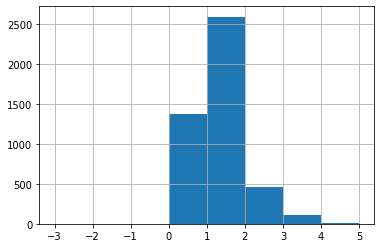

In [255]:
a.hist(bins=8)

In [248]:
# o ile różni się wiek dzieci
a.value_counts()

 1    2589
 0    1378
 2     460
 3     116
 4       7
 5       2
-2       1
-3       1
dtype: int64

## 2. Wstępna analiza

#### histogram wyniku testu

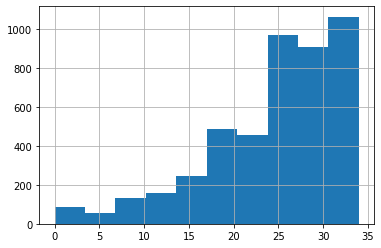

In [114]:
data["PWZ_WYNIK"].hist()

#### histogram wyniku testu w podziale na płeć

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffda4e2e190>,
      dtype=object)

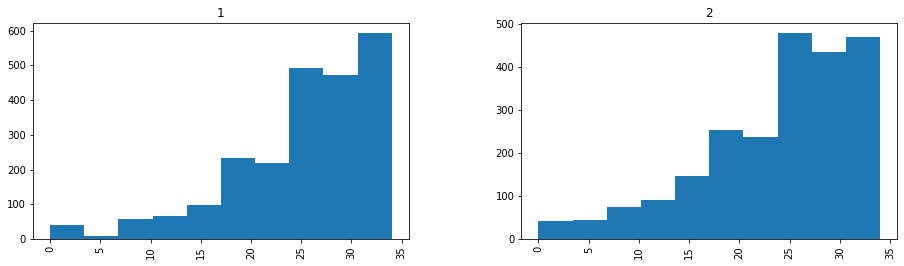

In [152]:
fig = plt.figure(figsize = (15,4))
ax = fig.gca()
data.groupby(["ID_DZIECKA", "PLEC", "PWZ_WYNIK"]).agg({"PWZ_WYNIK":"mean"}).hist(by=("PLEC"), ax=ax)

#### histogram wieku

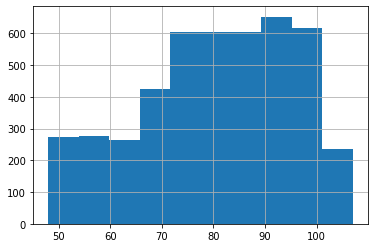

In [115]:
data["WIEK_MIESIACE"].hist()

#### Wiek zaokrąglony do pełnego roku i liczba dzieci w danym przedziale

In [117]:
np.floor(data["WIEK_MIESIACE"]/12).value_counts().sort_index()

4.0     549
5.0     687
6.0    1209
7.0    1255
8.0     854
Name: WIEK_MIESIACE, dtype: int64

#### histogram wyniku testu w poszczególnych grupach wiekowych

In [135]:
data["wiek_rok"] = np.floor(data["WIEK_MIESIACE"]/12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffda5b55990>,
      dtype=object)

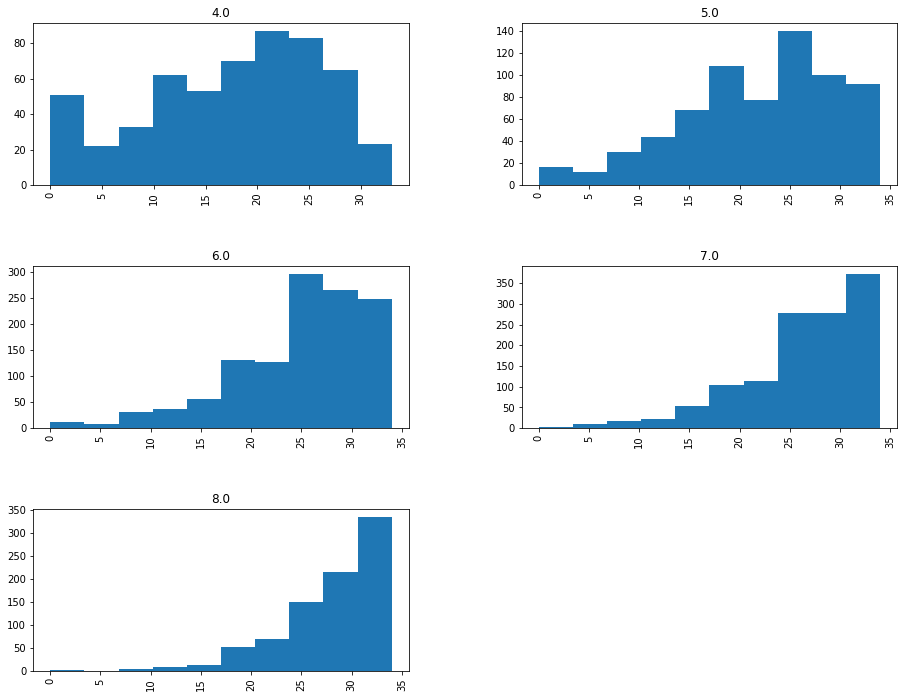

In [156]:
fig = plt.figure(figsize = (15,12))
ax = fig.gca()
data.groupby(["ID_DZIECKA", "wiek_rok", "PWZ_WYNIK"]).agg({"PWZ_WYNIK":"mean"}).hist(by=("wiek_rok"), ax = ax)

### Trudność pytań

In [256]:
data_ref = data.loc[data.WYKLUCZENIE_POWOD_MOWA=="NIE DOTYCZY", :]

##### trudność badana po usunięciu dzieci z powodem wykluczenia innym niż "NIE DOTYCZY"

In [257]:
data_ref.shape, data.shape

((4216, 126), (4554, 126))

#### Uszeregowanie pytań względem malejącej i rosnącej trudności dla wszystkich dzieci i czterolatków
Rankingi są bardzo podobne, choć różni się jak bardzo te pytania są trudne

In [265]:
trudnosc_wszyscy = (data_ref[item_cols].sum()/data_ref.shape[0]).sort_values().rename("trudność wszyscy")
trudnosc_wszyscy

PWZ_34_PKT    0.220351
PWZ_32_PKT    0.227704
PWZ_31_PKT    0.360769
PWZ_33_PKT    0.490750
PWZ_24_PKT    0.512097
PWZ_30_PKT    0.537002
PWZ_27_PKT    0.553605
PWZ_26_PKT    0.554791
PWZ_29_PKT    0.573292
PWZ_23_PKT    0.582306
PWZ_28_PKT    0.627609
PWZ_25_PKT    0.645636
PWZ_18_PKT    0.688805
PWZ_20_PKT    0.716556
PWZ_22_PKT    0.716793
PWZ_21_PKT    0.738615
PWZ_05_PKT    0.770873
PWZ_19_PKT    0.783918
PWZ_12_PKT    0.798387
PWZ_16_PKT    0.827799
PWZ_17_PKT    0.829696
PWZ_11_PKT    0.832306
PWZ_15_PKT    0.856499
PWZ_06_PKT    0.869070
PWZ_07_PKT    0.873577
PWZ_14_PKT    0.904649
PWZ_01_PKT    0.918169
PWZ_08_PKT    0.918880
PWZ_10_PKT    0.924336
PWZ_09_PKT    0.940465
PWZ_03_PKT    0.942600
PWZ_04_PKT    0.943074
PWZ_13_PKT    0.953273
PWZ_02_PKT    0.967268
Name: trudność wszyscy, dtype: float64

In [266]:
small_kids = data_ref.loc[data_ref.wiek_rok<=4, :]
trudnosc_male = (small_kids[item_cols].sum()/small_kids.shape[0]).sort_values().rename("trudność czterolatki")
trudnosc_male

PWZ_32_PKT    0.043233
PWZ_34_PKT    0.062030
PWZ_31_PKT    0.127820
PWZ_30_PKT    0.208647
PWZ_33_PKT    0.218045
PWZ_24_PKT    0.225564
PWZ_27_PKT    0.276316
PWZ_29_PKT    0.332707
PWZ_23_PKT    0.351504
PWZ_26_PKT    0.366541
PWZ_28_PKT    0.396617
PWZ_22_PKT    0.415414
PWZ_20_PKT    0.437970
PWZ_18_PKT    0.443609
PWZ_25_PKT    0.496241
PWZ_21_PKT    0.522556
PWZ_11_PKT    0.537594
PWZ_05_PKT    0.539474
PWZ_12_PKT    0.562030
PWZ_17_PKT    0.573308
PWZ_19_PKT    0.586466
PWZ_16_PKT    0.603383
PWZ_15_PKT    0.704887
PWZ_06_PKT    0.716165
PWZ_07_PKT    0.723684
PWZ_14_PKT    0.744361
PWZ_01_PKT    0.766917
PWZ_04_PKT    0.810150
PWZ_09_PKT    0.819549
PWZ_08_PKT    0.825188
PWZ_10_PKT    0.836466
PWZ_03_PKT    0.840226
PWZ_13_PKT    0.860902
PWZ_02_PKT    0.868421
Name: trudność czterolatki, dtype: float64

In [268]:
pd.concat([trudnosc_wszyscy, trudnosc_male], axis = 1)

/Users/sprzygocka/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,trudność wszyscy,trudność czterolatki
PWZ_01_PKT,0.918169,0.766917
PWZ_02_PKT,0.967268,0.868421
PWZ_03_PKT,0.942600,0.840226
PWZ_04_PKT,0.943074,0.810150
PWZ_05_PKT,0.770873,0.539474
PWZ_06_PKT,0.869070,0.716165
PWZ_07_PKT,0.873577,0.723684
PWZ_08_PKT,0.918880,0.825188
PWZ_09_PKT,0.940465,0.819549
PWZ_10_PKT,0.924336,0.836466
